# Analysis of Produce Sales at a Grocery Store

### Apratim Biswas

In [50]:
import sys
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
import joblib
from joblib import dump

In [51]:
df_data=pd.read_csv("../Dunnhumby-The_Complete_Journey-Data Prep/data/all_tables_combined.csv")   #read data from all_tables_combined.csv

In [52]:
df_data.head(3)

,household_key,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,...,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2305,873203,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
1,2305,873203,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ
2,2305,873203,1,1.89,414,0.00,1111,0.0,0.0,TypeA,...,Homeowner,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ


In [53]:
#df_s_parent=df_data[df_data['HH_COMP_DESC']=="1 Adult Kids"]
#df_s_parent=df_data

In [54]:
#determining length of campaign and dropping unnecessary columns.

df_data['NUM_DAYS']=df_data['END_DAY'] - df_data['START_DAY'] + 1
df_data.drop(['START_DAY','END_DAY','COUPON_UPC','household_key','PRODUCT_ID'], axis=1, inplace=True)

In [55]:
df_data.head(2)

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48


In [56]:
#sns.pairplot(df_data)

In [57]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
0,1,1.67,414,-1.02,1300,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
1,1,1.79,414,-0.90,1220,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
2,1,1.89,414,0.00,1111,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
3,1,1.67,414,-0.22,1341,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
4,1,1.67,414,-0.22,1243,0.0,0.0,TypeA,13,510,...,Single Female,1,None/Unknown,69,GROCERY,Private,CHEESE,SHREDDED CHEESE,8 OZ,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112017,1,2.50,304,-0.19,1456,0.0,0.0,TypeA,18,603,...,1 Adult Kids,4,3+,135,GROCERY,National,FRZN POTATOES,FRZN FRENCH FRIES,26 OZ,56
112018,2,3.70,402,0.00,1334,0.0,0.0,TypeA,8,438,...,2 Adults No Kids,2,None/Unknown,1251,GROCERY,National,SOUP,RTS SOUP: CHUNKY/HOMESTYLE ET,18.8 OZ,49
112019,1,5.49,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56
112020,1,5.59,402,0.00,1334,0.0,0.0,TypeA,18,608,...,2 Adults No Kids,2,None/Unknown,26,DRUG GM,National,DIETARY AID PRODUCTS,DIET CNTRL LIQS NUTRITIONAL,,56


Let's compute discount percent and then drop all rows with NA.

In [58]:
df_data['DISCOUNT_PCT']=(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC'])*100/(df_data['RETAIL_DISC']+df_data['COUPON_DISC']+df_data['COUPON_MATCH_DISC']+df_data['SALES_VALUE'])
df_data['DISCOUNT_PCT']=~df_data['DISCOUNT_PCT'].isna()
df_data['DISCOUNT_PCT'].isna().sum()

0

In [59]:
df_data['description'].value_counts()   #number of transactions belonging to campaign within each type of campaign.

TypeA    105537
TypeB      5972
TypeC       513
Name: description, dtype: int64

In [60]:
df_data.columns

Index(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN', 'DAY',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC',
       'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT', 'NUM_DAYS',
       'DISCOUNT_PCT'],
      dtype='object')

Let's take a look at the most frequent commodities in the dataset.

In [61]:
df_data['COMMODITY_DESC'].value_counts()

FLUID MILK PRODUCTS          6210
BEEF                         5660
FRZN MEAT/MEAT DINNERS       5620
YOGURT                       5403
TROPICAL FRUIT               3832
                             ... 
HALLOWEEN                       1
FALL AND WINTER SEASONAL        1
GIFT & FRUIT BASKETS            1
PWDR/CRYSTL DRNK MX             1
WATCHES/CALCULATORS/LOBBY       1
Name: COMMODITY_DESC, Length: 215, dtype: int64

In [62]:
df_data['COMMODITY_DESC'].unique()

array(['CHEESE', 'GRAPES', 'SALAD MIX', 'MELONS', 'TOMATOES',
       'FLUID MILK PRODUCTS', 'VEGETABLES - ALL OTHERS',
       'MILK BY-PRODUCTS', 'COLD CEREAL', 'SEAFOOD-FRESH', 'EGGS',
       'TROPICAL FRUIT', 'FLORAL-FRESH CUT', 'FROZEN PIZZA',
       'PASTA SAUCE', 'FRZN MEAT/MEAT DINNERS', 'FROZEN PIE/DESSERTS',
       'FROZEN BREAD/DOUGH', 'SALAD BAR', 'CHICKEN', 'MARGARINES',
       'BACON', 'BEEF', 'PORK', 'REFRGRATD JUICES/DRNKS',
       'FRUIT - SHELF STABLE', 'REFRGRATD DOUGH PRODUCTS', 'LUNCHMEAT',
       'MEAT - MISC', 'HOT DOGS', 'SWEET GOODS & SNACKS', 'BERRIES',
       'YOGURT', 'ICE CREAM/MILK/SHERBTS', 'TURKEY',
       'BROCCOLI/CAULIFLOWER', 'MOLASSES/SYRUP/PANCAKE MIXS', 'CITRUS',
       'APPLES', 'VEGETABLES SALAD', 'PEPPERS-ALL', 'SEAFOOD - FROZEN',
       'VEAL', 'LAXATIVES', 'ORAL HYGIENE PRODUCTS', 'COLD AND FLU',
       'MAKEUP AND TREATMENT', 'ANALGESICS', 'SOFT DRINKS', 'CARROTS',
       'PICKLE/RELISH/PKLD VEG', 'DINNER SAUSAGE',
       'FRZN NOVELTIES/WTR I

Let's take a look at the most frequent sub-commodities in the dataset.

In [63]:
df_data['SUB_COMMODITY_DESC'].value_counts().head(10)

YOGURT NOT MULTI-PACKS            4618
FLUID MILK WHITE ONLY             4314
BANANAS                           3274
FRZN SS PREMIUM ENTREES/DNRS/N    2309
DAIRY CASE 100% PURE JUICE - O    2063
PREMIUM                           1897
PRIMAL                            1636
SHREDDED CHEESE                   1352
REFRIGERATED COFFEE CREAMERS      1305
FRZN BAGGED VEGETABLES - PLAIN    1284
Name: SUB_COMMODITY_DESC, dtype: int64

Liquid milk is one of the simple product categories since the "sub-commodities" are very comparable. For this exercise we select only those transactions whose sub-commodity includes the word "milk" and further filter it to only the following three sub-categories:  
'FLUID MILK WHITE ONLY'  
'MISCELLANEOUS MILK'  
'CHOCOLATE MILK'

In [64]:
df_data[df_data['SUB_COMMODITY_DESC'].str.contains('MILK')]['SUB_COMMODITY_DESC'].unique()

array(['FLUID MILK WHITE ONLY', 'INFANT FORMULA MILK BASE', 'BUTTERMILK',
       'CHOCOLATE MILK', 'MISCELLANEOUS MILK', 'FLUID MILK',
       'SOY/RICE MILK'], dtype=object)

In [65]:
df_data=df_data[(df_data['SUB_COMMODITY_DESC']=='FLUID MILK WHITE ONLY') | (df_data['SUB_COMMODITY_DESC']=='MISCELLANEOUS MILK') | (df_data['SUB_COMMODITY_DESC']=='CHOCOLATE MILK')]

In [66]:
df_data.columns.values

array(['QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'description', 'CAMPAIGN',
       'DAY', 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC',
       'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'MANUFACTURER', 'DEPARTMENT', 'BRAND',
       'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
       'NUM_DAYS', 'DISCOUNT_PCT'], dtype=object)

In [67]:
df_data.drop(['TRANS_TIME','AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC', 'DEPARTMENT', 'COMMODITY_DESC','DISCOUNT_PCT'], axis=1, inplace=True)

/home/user-1711/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
df_data

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS
72,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
73,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
74,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
75,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
76,1,1.67,414,-0.82,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111432,1,1.00,292,-0.49,0.0,0.0,TypeA,18,608,531,National,CHOCOLATE MILK,PT,56
111433,1,2.89,292,0.00,0.0,0.0,TypeA,18,608,69,Private,CHOCOLATE MILK,1 GA,56
111435,1,1.00,292,-0.49,0.0,0.0,TypeA,18,608,531,National,MISCELLANEOUS MILK,13.5 OZ,56
111895,1,2.00,368,0.00,0.0,0.0,TypeA,13,506,5423,National,FLUID MILK WHITE ONLY,,48


In [69]:
df_data['CURR_SIZE_OF_PRODUCT'].value_counts()

1 GA        2280
            2053
16 OZ         98
1 QT          90
1 PT          63
1/2 GAL       51
64 OZ         40
32 OZ         19
GAL           17
8 OZ          12
1 GAL         10
PT             8
.5 GAL         6
13.5 OZ        5
1/2GAL         1
6PK/8 OZ       1
QT             1
Name: CURR_SIZE_OF_PRODUCT, dtype: int64

In [70]:
def label_to_volume(label):
    volume=int()
    if label=='1 GA':
        volume=128
    elif label=='1 PT':
        volume=16
    elif label=='16 OZ':
        volume=16
    elif label=='1 QT':
        volume=32
    elif label=='PT':
        volume=16
        
    return volume

vect_label_to_volume=np.vectorize(label_to_volume)

In [71]:
df_data['VOLUME']=vect_label_to_volume(df_data['CURR_SIZE_OF_PRODUCT'])
df_data.head()

<ipython-input-71-8553da09263f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['VOLUME']=vect_label_to_volume(df_data['CURR_SIZE_OF_PRODUCT'])


,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,description,CAMPAIGN,DAY,MANUFACTURER,BRAND,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,NUM_DAYS,VOLUME
72,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
73,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
74,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
75,1,2.49,414,0.00,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128
76,1,1.67,414,-0.82,0.0,0.0,TypeA,13,510,69,Private,FLUID MILK WHITE ONLY,1 GA,48,128


In [72]:
df_data.groupby('CAMPAIGN').sum()

,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DAY,MANUFACTURER,NUM_DAYS,VOLUME
CAMPAIGN,,,,,,,,,,
8,4414,7395.21,11526800,-2260.05,-6.09,-1.40,1038395,253625,119119,165888
13,2651,4388.69,5413378,-1344.57,-7.52,-0.45,839104,235690,78096,88576
18,1474,2299.86,917666,-798.35,-4.54,-1.45,419973,71762,39032,42960


In [73]:
df_data=df_data[(df_data['SALES_VALUE']<=8)&(df_data['SALES_VALUE']>0)]

In [74]:
sales=df_data['SALES_VALUE']

In [75]:
df_data_features=df_data.drop('SALES_VALUE', axis=1)

In [76]:
dummy=pd.get_dummies(df_data_features['BRAND'],drop_first=True)
dummy_milk_type=pd.get_dummies(df_data_features['SUB_COMMODITY_DESC'],drop_first=True)
#dummy_hh_size_desc=pd.get_dummies(df_s_parent_features['HOUSEHOLD_SIZE_DESC'],drop_first=True)
dummy_manufacturer=pd.get_dummies(df_data_features['MANUFACTURER'],drop_first=True)
df_data_features=pd.concat([df_data_features,dummy], axis=1)
df_data_features=pd.concat([df_data_features,dummy_milk_type], axis=1)
#df_s_parent_features=pd.concat([df_s_parent_features,dummy_hh_size_desc], axis=1)
df_data_features=pd.concat([df_data_features,dummy_manufacturer], axis=1)
df_data_features.columns

Index([             'QUANTITY',              'STORE_ID',
                 'RETAIL_DISC',           'COUPON_DISC',
           'COUPON_MATCH_DISC',           'description',
                    'CAMPAIGN',                   'DAY',
                'MANUFACTURER',                 'BRAND',
          'SUB_COMMODITY_DESC',  'CURR_SIZE_OF_PRODUCT',
                    'NUM_DAYS',                'VOLUME',
                     'Private', 'FLUID MILK WHITE ONLY',
          'MISCELLANEOUS MILK',                     531,
                           709,                     865,
                           926,                     927,
                          1078,                    1453,
                          1487,                    1543,
                          5423],
      dtype='object')

In [77]:
df_data_features.drop(['STORE_ID','QUANTITY','BRAND','description','MANUFACTURER','CURR_SIZE_OF_PRODUCT','SUB_COMMODITY_DESC', 'CAMPAIGN', 'NUM_DAYS'], axis=1, inplace=True)

We want to include variables that are not strongly correlated. Seaborn's heatmap method is perfect for visualizing the inter-relationships between variables.

<AxesSubplot:>

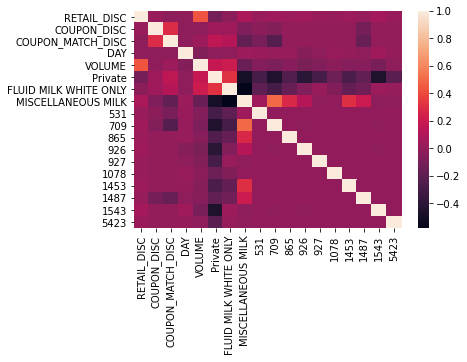

In [78]:
sns.heatmap(df_data_features.corr())

In [79]:
df_data_features.columns.values

array(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'DAY', 'VOLUME',
       'Private', 'FLUID MILK WHITE ONLY', 'MISCELLANEOUS MILK', 531, 709,
       865, 926, 927, 1078, 1453, 1487, 1543, 5423], dtype=object)

In [80]:
X=df_data_features
y=sales

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 22)

Instantiate StandardScaler and save scaling data.

In [82]:
sscaler=StandardScaler()

In [83]:
X_train_scaled=sscaler.fit_transform(X_train)
dump(sscaler,'./models/scaler_file.save')

X_test_scaled=sscaler.fit_transform(X_test)

In [84]:
X_test_scaled

array([[ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       ...,
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        10.22474716, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065],
       [ 0.63391054,  0.0569051 ,  0.04942204, ..., -0.05089866,
        -0.09780193, -0.04154065]])

In [85]:
lasso=Lasso(alpha=0.00001,max_iter=99999)
lasso.fit(X_train_scaled,np.log(y_train))

Lasso(alpha=1e-05, max_iter=99999)

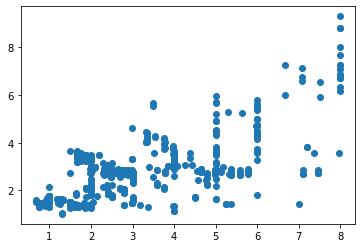

In [86]:
y_preds=np.exp(lasso.predict(X_test_scaled))
plt.scatter(y_test,y_preds)

/home/user-1711/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_VALUE'>

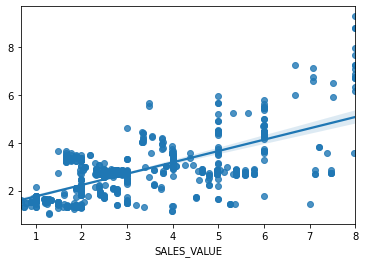

In [87]:
sns.regplot(y_test,y_preds)

In [88]:
features_and_coefs=pd.DataFrame({'features':X.columns, 'coefs':lasso.coef_}).sort_values(by='coefs', ascending=False)
features_and_coefs #.features.values

,features,coefs
4,VOLUME,0.358467
16,1543,0.091982
7,MISCELLANEOUS MILK,0.073165
11,926,0.065984
12,927,0.054736
13,1078,0.027690
3,DAY,0.019208
2,COUPON_MATCH_DISC,0.015641
15,1487,0.014913
6,FLUID MILK WHITE ONLY,0.014789


In [89]:
X_test_scaled[0]

array([ 0.63391054,  0.0569051 ,  0.04942204,  1.72126429, -0.73565356,
        0.21435005,  0.31532811, -0.19847223, -0.06576671, -0.11440719,
       -0.04154065, -0.09320996, -0.04154065, -0.02936101,  0.        ,
       -0.05089866, -0.09780193, -0.04154065])

In [90]:
cross_val_score(lasso, X_train_scaled,np.log(y_train))

array([0.48892423, 0.49725852, 0.49222139, 0.5417816 , 0.45591951])

In [91]:
cross_val_score(lasso, X_test_scaled,np.log(y_test))

array([0.48133518, 0.41879741, 0.52471888, 0.46105774, 0.47801642])

Next we'll try to estimate using ridge instead of lasso and see hot it performs.

In [92]:
ridge=Ridge()
ridge.fit(X_train_scaled,np.log(y_train))

Ridge()

In [93]:
y_ridge_preds=np.exp(ridge.predict(X_test_scaled))

In [94]:
cross_val_score(ridge, X_test_scaled,np.log(y_test))

array([0.48368774, 0.41889891, 0.52452018, 0.46111541, 0.48377427])

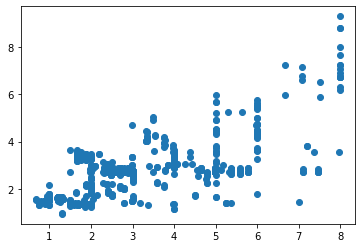

In [95]:
plt.scatter(y_test,y_ridge_preds)

Finally we save both models

In [96]:
dump(lasso, './models/sales_value_lasso_model.joblib')

['./models/sales_value_lasso_model.joblib']

In [97]:
dump(ridge, './models/sales_value_ridge_model.joblib')

['./models/sales_value_ridge_model.joblib']